In [250]:
import requests
import sqlalchemy as sqla
from sqlalchemy import create_engine
import requests_cache
requests_cache.install_cache('covidcast_cache')

In [251]:
#imports
import pandas as pd
import numpy as np
import plotnine as p9
from datetime import datetime

%matplotlib inline


In [252]:
import matplotlib.pyplot as plt

In [253]:
df= pd.read_csv('us-states.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [254]:
statedf = df[df['state'] == 'Washington'] 

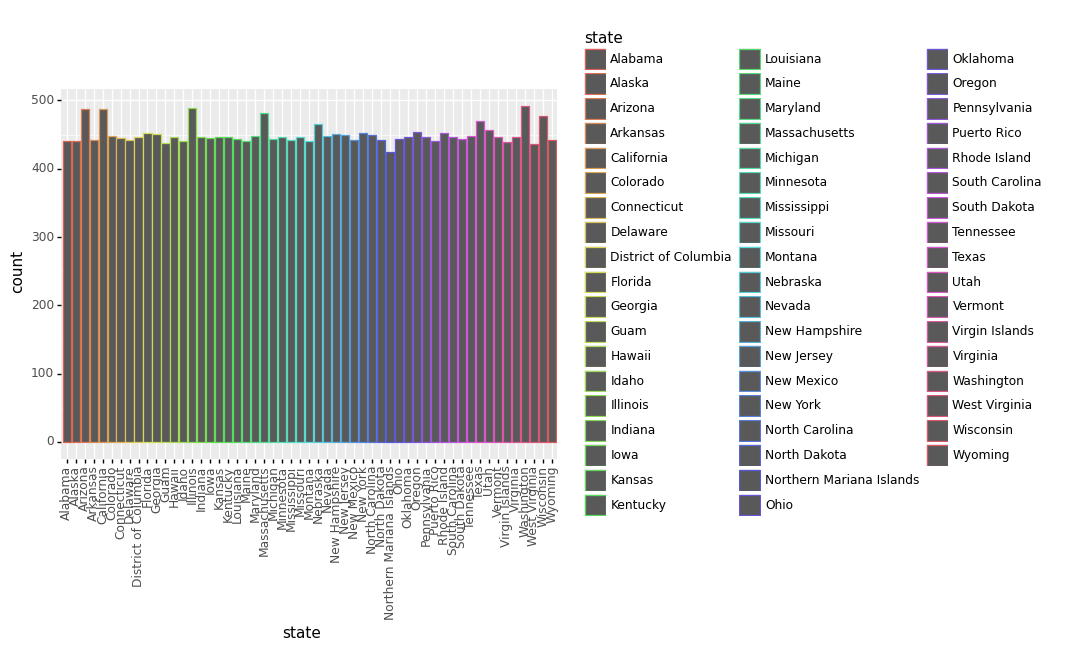

<ggplot: (149153932301)>

In [255]:
ggplot(df, aes(x='state', fill = 'cases', colour = 'state')) + geom_bar(stat = 'count') + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

In [260]:
df3= pd.read_csv('colleges.csv')
df3 = df3.replace(r'^\s*$', np.nan, regex=True)
df3.head()

date    state      county        city  ipeds_id  \
0  2021-05-26  Alabama     Madison  Huntsville    100654   
1  2021-05-26  Alabama  Montgomery  Montgomery    100724   
2  2021-05-26  Alabama   Limestone      Athens    100812   
3  2021-05-26  Alabama         Lee      Auburn    100858   
4  2021-05-26  Alabama  Montgomery  Montgomery    100830   

                           college  cases  cases_2021 notes  
0           Alabama A&M University     41         NaN   NaN  
1         Alabama State University      2         NaN   NaN  
2          Athens State University     45        10.0   NaN  
3                Auburn University   2742       567.0   NaN  
4  Auburn University at Montgomery    220        80.0   NaN

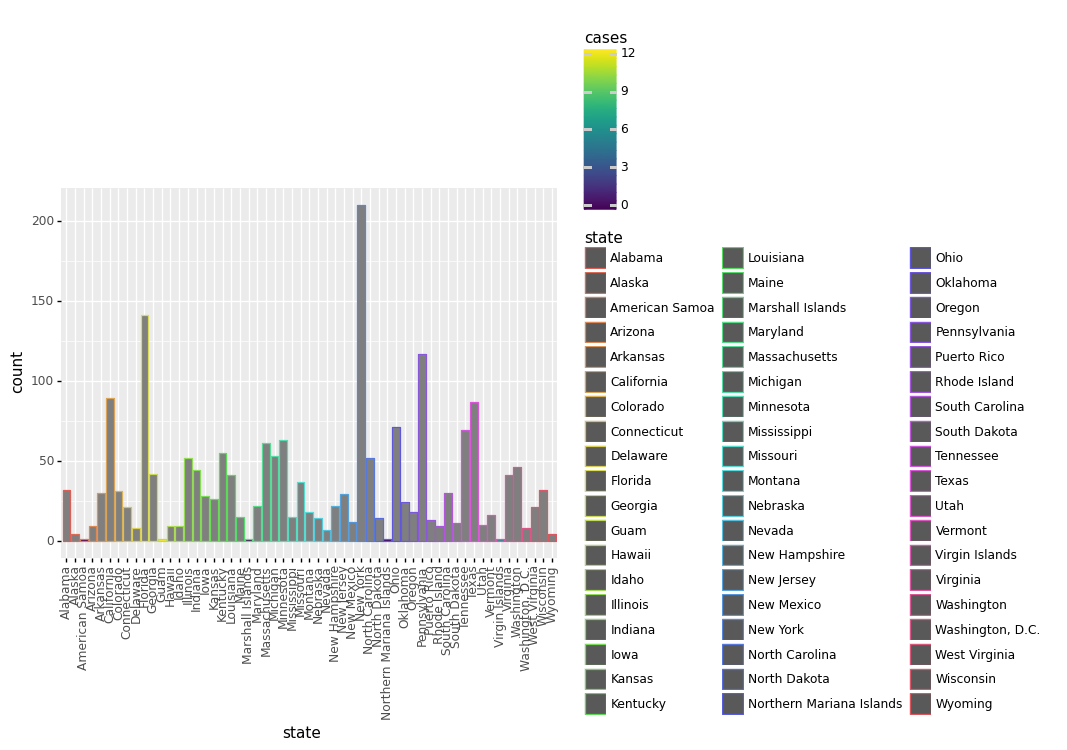

<ggplot: (149153932391)>

In [261]:
ggplot(df3, aes(x='state', fill = 'cases', colour = 'state')) + geom_bar(stat = 'count') + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

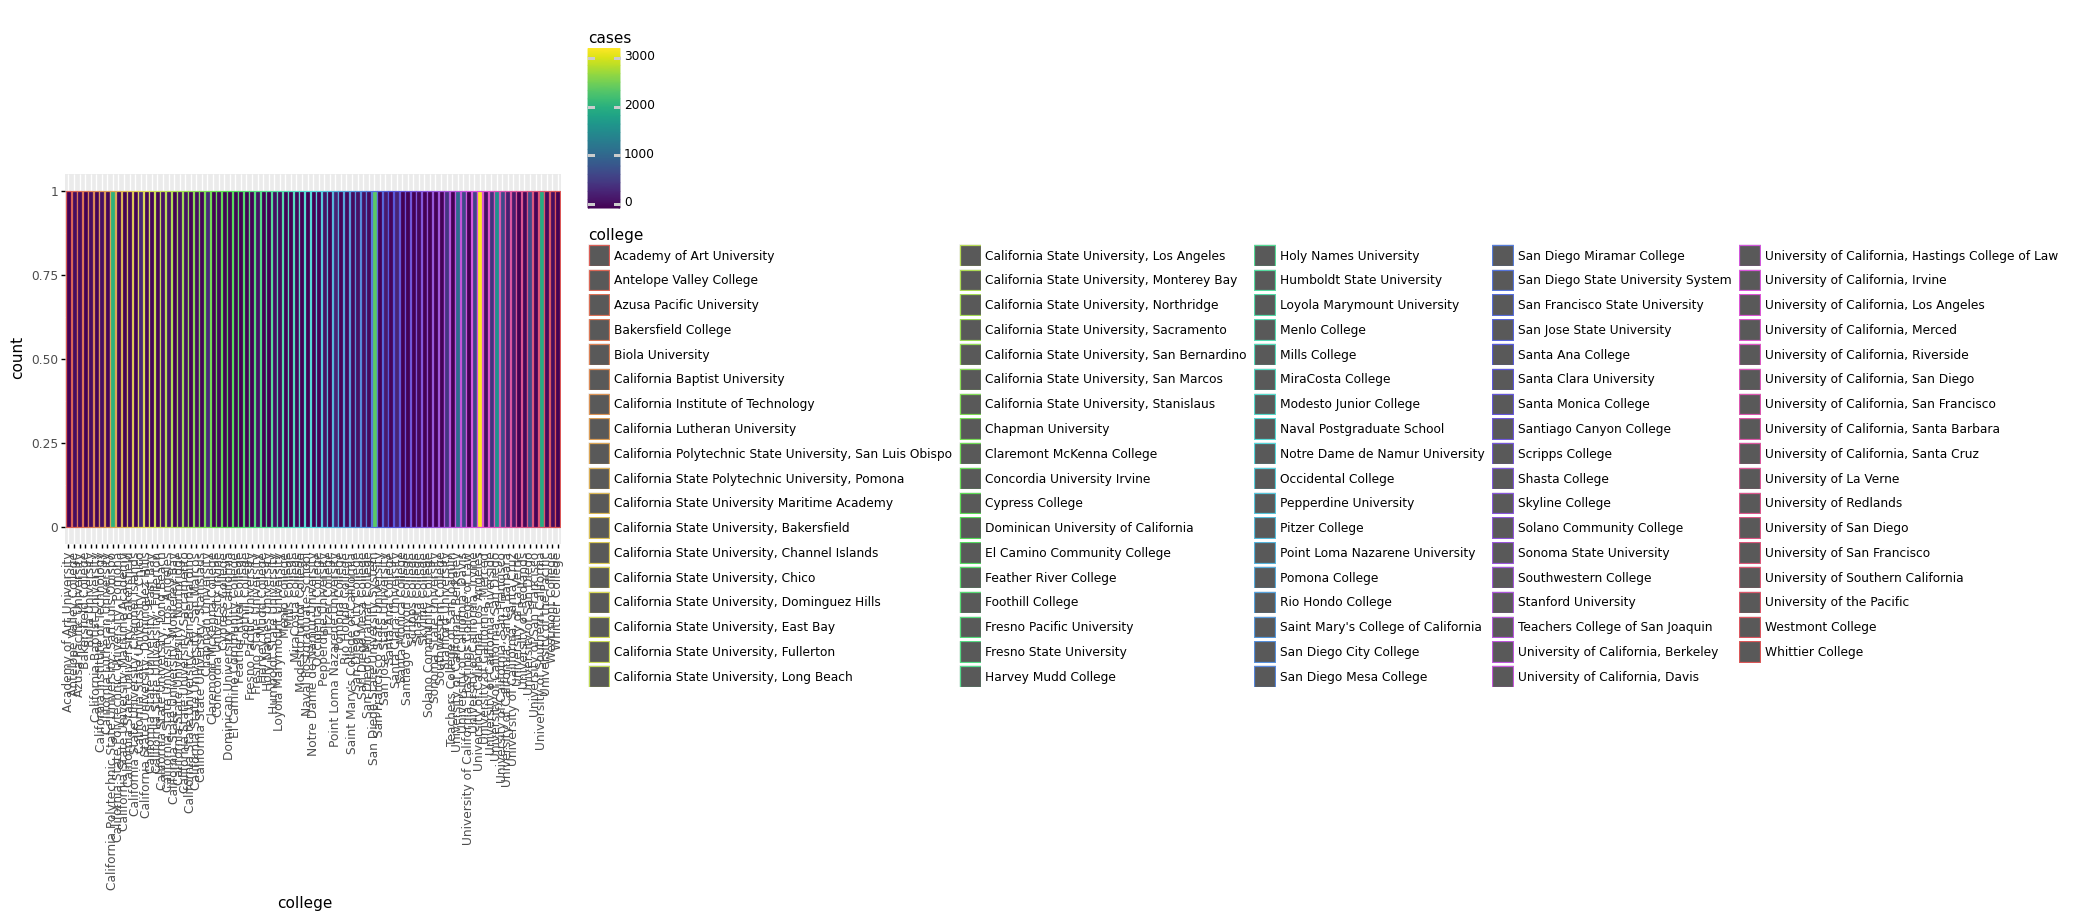

<ggplot: (149153937125)>

In [262]:
dfcalicollege= df3[df3['state'] == 'California'] 
ggplot(dfcalicollege, aes(x='college', fill = 'cases', colour = 'college')) + geom_bar(stat = 'count') + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

In [263]:
df4= dfcalicollege[(dfcalicollege['college'] == 'University of California, Davis') | (dfcalicollege['college'] == 'University of California, Merced')
                  | (dfcalicollege['college'] == 'University of California, Los Angeles')
                  | (dfcalicollege['college'] == 'University of California, Riverside')
                  | (dfcalicollege['college'] == 'University of California, Irvine')
                  | (dfcalicollege['college'] == 'University of California, Santa Cruz')
                  | (dfcalicollege['college'] == 'University of California, Santa Barbara')
                  | (dfcalicollege['college'] == 'University of California, San Diego')
                  | (dfcalicollege['college'] == 'University of California, Berkeley')] 
df4

date       state         county           city  ipeds_id  \
146  2021-05-26  California        Alameda       Berkeley    110635   
147  2021-05-26  California           Yolo          Davis    110644   
149  2021-05-26  California         Orange        Irvine     110653   
150  2021-05-26  California    Los Angeles    Los Angeles    110662   
151  2021-05-26  California         Merced         Merced    445188   
152  2021-05-26  California      Riverside      Riverside    110671   
153  2021-05-26  California      San Diego      San Diego    110680   
155  2021-05-26  California  Santa Barbara  Santa Barbara    110705   
156  2021-05-26  California     Santa Cruz     Santa Cruz    110714   

                                     college  cases  cases_2021  \
146       University of California, Berkeley   1095       679.0   
147          University of California, Davis    678       555.0   
149         University of California, Irvine    617       276.0   
150    University of California, Los Angeles   3119      1461.0   
151         University of California, Merced    124        63.0   
152      University of California, Riverside    433       178.0   
153      University of California, San Diego   1543       635.0   
155  University of California, Santa Barbara    269       236.0   
156     University of California, Santa Cruz    228       121.0   

                                                 notes  
146                                                NaN  
147                                                NaN  
149                                                NaN  
150                                                NaN  
151                                                NaN  
152                                                NaN  
153  Total is known to include one or more cases fr...  
155                                                NaN  
156                                                NaN

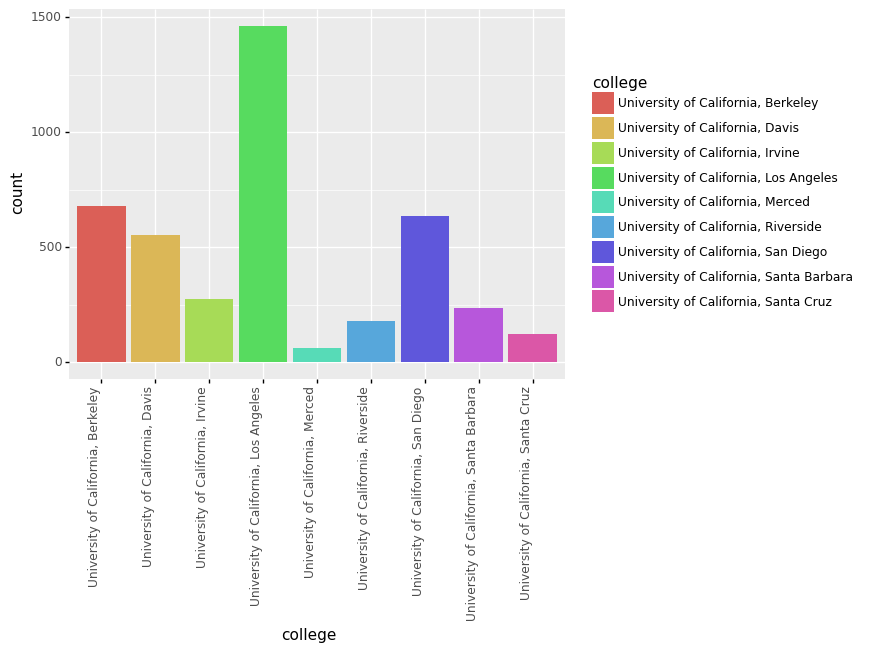

<ggplot: (149157833704)>

In [264]:
w = ['cases', ]
ggplot(df4, aes(x='college', weight = 'cases_2021', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

In [265]:
df4['tot']=df4['cases']+df4['cases_2021']
df4.head()

<ipython-input-265-43770067c656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


date       state       county         city  ipeds_id  \
146  2021-05-26  California      Alameda     Berkeley    110635   
147  2021-05-26  California         Yolo        Davis    110644   
149  2021-05-26  California       Orange      Irvine     110653   
150  2021-05-26  California  Los Angeles  Los Angeles    110662   
151  2021-05-26  California       Merced       Merced    445188   

                                   college  cases  cases_2021 notes     tot  
146     University of California, Berkeley   1095       679.0   NaN  1774.0  
147        University of California, Davis    678       555.0   NaN  1233.0  
149       University of California, Irvine    617       276.0   NaN   893.0  
150  University of California, Los Angeles   3119      1461.0   NaN  4580.0  
151       University of California, Merced    124        63.0   NaN   187.0

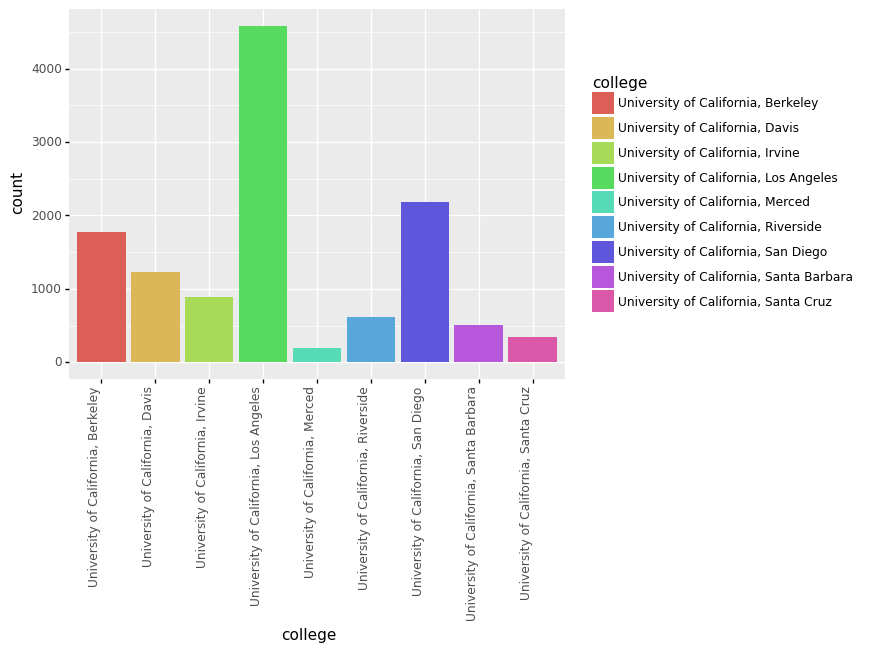

<ggplot: (149156278441)>

In [266]:
ggplot(df4, aes(x='college', weight = 'tot', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

In [267]:
df3.head()

date    state      county        city  ipeds_id  \
0  2021-05-26  Alabama     Madison  Huntsville    100654   
1  2021-05-26  Alabama  Montgomery  Montgomery    100724   
2  2021-05-26  Alabama   Limestone      Athens    100812   
3  2021-05-26  Alabama         Lee      Auburn    100858   
4  2021-05-26  Alabama  Montgomery  Montgomery    100830   

                           college  cases  cases_2021 notes  
0           Alabama A&M University     41         NaN   NaN  
1         Alabama State University      2         NaN   NaN  
2          Athens State University     45        10.0   NaN  
3                Auburn University   2742       567.0   NaN  
4  Auburn University at Montgomery    220        80.0   NaN

In [268]:
df4= pd.read_csv('counties.csv')
df4.head()

date   county    state    fips  cases  deaths  confirmed_cases  \
0  2021-06-05  Autauga  Alabama  1001.0   7186   112.0           6006.0   
1  2021-06-05  Baldwin  Alabama  1003.0  21698   312.0          15241.0   
2  2021-06-05  Barbour  Alabama  1005.0   2342    59.0           1305.0   
3  2021-06-05     Bibb  Alabama  1007.0   2666    64.0           2138.0   
4  2021-06-05   Blount  Alabama  1009.0   6906   139.0           5274.0   

   confirmed_deaths  probable_cases  probable_deaths  
0             101.0          1180.0             11.0  
1             234.0          6457.0             78.0  
2              41.0          1037.0             18.0  
3              40.0           528.0             24.0  
4             115.0          1632.0             24.0

In [269]:
df5 = df4.groupby(['county'])[['cases']].agg('sum')
df5.head()

cases
county          
Abbeville   2599
Acadia      6713
Accomack    2861
Ada        53011
Adair       8489

In [270]:
df5.rename(columns = {'cases':'county cases'}, inplace = True)
dfm = pd.merge(df3, df5, on="county")
dfm.head()
dftest = dfm.replace(np.nan,0)
dftest.head()

date     state   county          city  ipeds_id  \
0  2021-05-26   Alabama  Madison    Huntsville    100654   
1  2021-05-26   Alabama  Madison    Huntsville    100706   
2  2021-05-26   Florida  Madison       Madison    136145   
3  2021-05-26     Idaho  Madison       Rexburg    142522   
4  2021-05-26  Illinois  Madison  Edwardsville    149231   

                                     college  cases  cases_2021 notes  \
0                     Alabama A&M University     41         0.0     0   
1        University of Alabama in Huntsville    393       183.0     0   
2                      North Florida College     35        17.0     0   
3             Brigham Young University-Idaho   2655       876.0     0   
4  Southern Illinois University Edwardsville    472       160.0     0   

   county cases  
0        147784  
1        147784  
2        147784  
3        147784  
4        147784

In [271]:
dfm['college_county_case_prop'] = dfm['cases']/dfm['county cases']
dfm.head()

date     state   county          city  ipeds_id  \
0  2021-05-26   Alabama  Madison    Huntsville    100654   
1  2021-05-26   Alabama  Madison    Huntsville    100706   
2  2021-05-26   Florida  Madison       Madison    136145   
3  2021-05-26     Idaho  Madison       Rexburg    142522   
4  2021-05-26  Illinois  Madison  Edwardsville    149231   

                                     college  cases  cases_2021 notes  \
0                     Alabama A&M University     41         NaN   NaN   
1        University of Alabama in Huntsville    393       183.0   NaN   
2                      North Florida College     35        17.0   NaN   
3             Brigham Young University-Idaho   2655       876.0   NaN   
4  Southern Illinois University Edwardsville    472       160.0   NaN   

   county cases  college_county_case_prop  
0        147784                  0.000277  
1        147784                  0.002659  
2        147784                  0.000237  
3        147784                  0.017965  
4        147784                  0.003194

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide


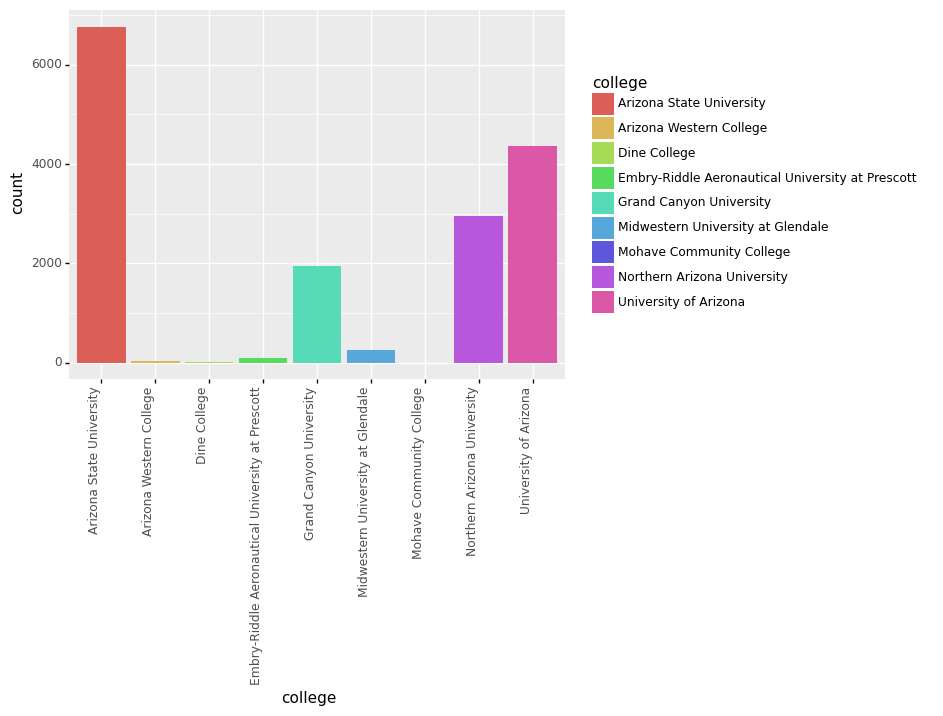

<ggplot: (149157476807)>

In [276]:
x = ['cases', 'county cases']
ggplot(df_arizona, aes(x='college', weight = 'cases', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

<AxesSubplot:xlabel='college'>

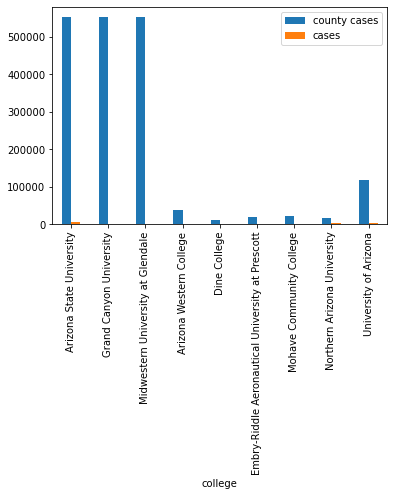

In [277]:
z = ['county cases', 'cases']
df_arizona.plot(x="college", y=z, kind="bar")

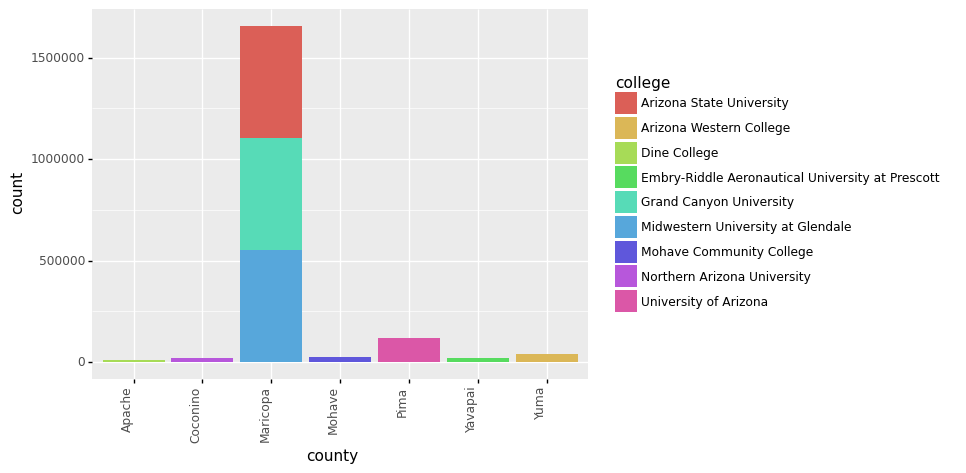

<ggplot: (149157561582)>

In [278]:
ggplot(df_arizona, aes(x='county', weight = 'county cases', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

In [279]:
df= pd.read_csv('colleges_with_pop.csv')
df.head()

Unnamed: 0        date    state      county        city  ipeds_id  \
0           0  2021-05-26  Alabama     Madison  Huntsville    100654   
1          24  2021-05-26  Alabama      Sumter  Livingston    101587   
2          22  2021-05-26  Alabama  Lauderdale    Florence    101879   
3          21  2021-05-26  Alabama      Shelby  Montevallo    101709   
4          20  2021-05-26  Alabama     Madison  Huntsville    100706   

                               college  cases  cases_2021  \
0               Alabama A&M University     41         NaN   
1           University of West Alabama     35         5.0   
2          University of North Alabama    763       275.0   
3             University of Montevallo    192        52.0   
4  University of Alabama in Huntsville    393       183.0   

                                               notes  \
0                                                NaN   
1  College did not clarify whether data includes ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   2018.student.enrollment.undergrad_12_month  \
0                                      5343.0   
1                                      2516.0   
2                                      7077.0   
3                                      2529.0   
4                                      8145.0   

                           school.name  school.locale      id  num_students  \
0             Alabama A & M University           12.0  100654        5343.0   
1           University of West Alabama           43.0  101587        2516.0   
2          University of North Alabama           13.0  101879        7077.0   
3             University of Montevallo           21.0  101709        2529.0   
4  University of Alabama in Huntsville           12.0  100706        8145.0   

   cases_per_capita    locale_name  \
0          0.007674  City: Midsize   
1          0.013911  Rural: Remote   
2          0.107814    City: Small   
3          0.075919  Suburb: Large   
4          0.048250  City: Midsize   

                                locale_name_detailed  
0  City: Midsize (population of at least 100,000 ...  
1  Rural: Remote (rural territory more than 25 mi...  
2         City: Small (population less than 100,000)  
3  Suburb: Large (outside principal city, in urba...  
4  City: Midsize (population of at least 100,000 ...

In [280]:
df2= pd.read_csv('college_state_averages.csv')
df2.head()

state  cases  cases_2021  num_students  cases_per_capita
0     Alabama  15457      3999.0      207112.0          0.074631
1      Alaska    430       133.0       38012.0          0.011312
2     Arizona  16171      5350.0      211258.0          0.076546
3    Arkansas  10041      2417.0      140555.0          0.071438
4  California  20451      9767.0     1299242.0          0.015741

In [281]:
dfm = pd.merge(df, df5, on="county")
dfm.head()

Unnamed: 0        date     state   county          city  ipeds_id  \
0           0  2021-05-26   Alabama  Madison    Huntsville    100654   
1          20  2021-05-26   Alabama  Madison    Huntsville    100706   
2         223  2021-05-26   Florida  Madison       Madison    136145   
3         308  2021-05-26     Idaho  Madison       Rexburg    142522   
4         349  2021-05-26  Illinois  Madison  Edwardsville    149231   

                                     college  cases  cases_2021 notes  \
0                     Alabama A&M University     41         NaN   NaN   
1        University of Alabama in Huntsville    393       183.0   NaN   
2                      North Florida College     35        17.0   NaN   
3             Brigham Young University-Idaho   2655       876.0   NaN   
4  Southern Illinois University Edwardsville    472       160.0   NaN   

   2018.student.enrollment.undergrad_12_month  \
0                                      5343.0   
1                                      8145.0   
2                                      1768.0   
3                                     78838.0   
4                                     12972.0   

                                 school.name  school.locale      id  \
0                   Alabama A & M University           12.0  100654   
1        University of Alabama in Huntsville           12.0  100706   
2                      North Florida College           41.0  136145   
3             Brigham Young University-Idaho           32.0  142522   
4  Southern Illinois University-Edwardsville           21.0  149231   

   num_students  cases_per_capita    locale_name  \
0        5343.0          0.007674  City: Midsize   
1        8145.0          0.048250  City: Midsize   
2        1768.0          0.019796  Rural: Fringe   
3       78838.0          0.033677  Town: Distant   
4       12972.0          0.036386  Suburb: Large   

                                locale_name_detailed  county cases  
0  City: Midsize (population of at least 100,000 ...        147784  
1  City: Midsize (population of at least 100,000 ...        147784  
2  Rural: Fringe (rural territory up to 5 miles f...        147784  
3  Town: Distant (in urban cluster more than 10 m...        147784  
4  Suburb: Large (outside principal city, in urba...        147784

In [282]:
dfcalicollege= dfm[dfm['state'] == 'California'] 
dfcalicollege.head()

Unnamed: 0        date       state  county       city  ipeds_id  \
140         107  2021-05-26  California  Orange  Santa Ana    121619   
141         110  2021-05-26  California  Orange     Orange    399212   
142         119  2021-05-26  California  Orange    Irvine     110653   
143          74  2021-05-26  California  Orange  Fullerton    110565   
144          84  2021-05-26  California  Orange     Irvine    112075   

                                    college  cases  cases_2021 notes  \
140                       Santa Ana College     37        12.0   NaN   
141                 Santiago Canyon College     14         6.0   NaN   
142        University of California, Irvine    617       276.0   NaN   
143  California State University, Fullerton     45        23.0   NaN   
144             Concordia University Irvine     82        59.0   NaN   

     2018.student.enrollment.undergrad_12_month  \
140                                     35606.0   
141                                     15808.0   
142                                     30865.0   
143                                     40621.0   
144                                      2046.0   

                               school.name  school.locale      id  \
140                      Santa Ana College           11.0  121619   
141                Santiago Canyon College           12.0  399212   
142        University of California-Irvine           11.0  110653   
143  California State University-Fullerton           21.0  110565   
144            Concordia University-Irvine           11.0  112075   

     num_students  cases_per_capita    locale_name  \
140       35606.0          0.001039    City: Large   
141       15808.0          0.000886  City: Midsize   
142       30865.0          0.019990    City: Large   
143       40621.0          0.001108  Suburb: Large   
144        2046.0          0.040078    City: Large   

                                  locale_name_detailed  county cases  
140        City: Large (population of 250,000 or more)        486025  
141  City: Midsize (population of at least 100,000 ...        486025  
142        City: Large (population of 250,000 or more)        486025  
143  Suburb: Large (outside principal city, in urba...        486025  
144        City: Large (population of 250,000 or more)        486025

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide


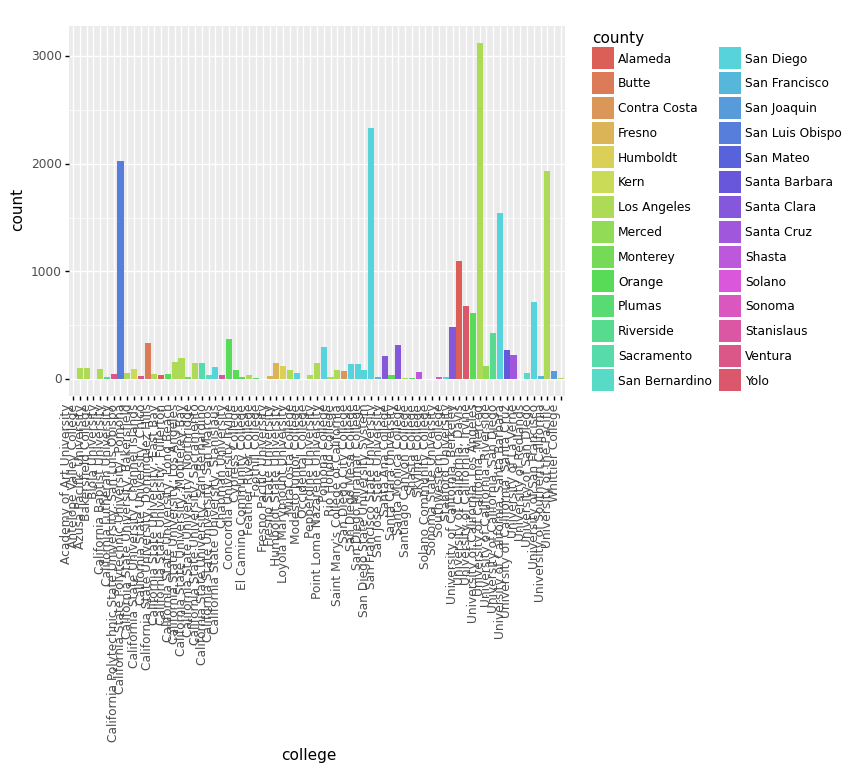

<ggplot: (149154536096)>

In [283]:
ggplot(dfcalicollege, aes(x='college', weight = 'cases', fill = 'county')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

In [284]:
dfuc= dfcalicollege[(dfcalicollege['college'] == 'University of California, Davis') | (dfcalicollege['college'] == 'University of California, Merced')
                  | (dfcalicollege['college'] == 'University of California, Los Angeles')
                  | (dfcalicollege['college'] == 'University of California, Riverside')
                  | (dfcalicollege['college'] == 'University of California, Irvine')
                  | (dfcalicollege['college'] == 'University of California, Santa Cruz')
                  | (dfcalicollege['college'] == 'University of California, Santa Barbara')
                  | (dfcalicollege['college'] == 'University of California, San Diego')
                  | (dfcalicollege['college'] == 'University of California, Berkeley')] 
dfuc.head()

Unnamed: 0        date       state       county         city  ipeds_id  \
142         119  2021-05-26  California       Orange      Irvine     110653   
168         120  2021-05-26  California  Los Angeles  Los Angeles    110662   
195         123  2021-05-26  California    San Diego    San Diego    110680   
203         117  2021-05-26  California      Alameda     Berkeley    110635   
208         125  2021-05-26  California   Santa Cruz   Santa Cruz    110714   

                                   college  cases  cases_2021  \
142       University of California, Irvine    617       276.0   
168  University of California, Los Angeles   3119      1461.0   
195    University of California, San Diego   1543       635.0   
203     University of California, Berkeley   1095       679.0   
208   University of California, Santa Cruz    228       121.0   

                                                 notes  \
142                                                NaN   
168                                                NaN   
195  Total is known to include one or more cases fr...   
203                                                NaN   
208                                                NaN   

     2018.student.enrollment.undergrad_12_month  \
142                                     30865.0   
168                                     33160.0   
195                                     30143.0   
203                                     32309.0   
208                                     18534.0   

                              school.name  school.locale      id  \
142       University of California-Irvine           11.0  110653   
168  University of California-Los Angeles           11.0  110662   
195    University of California-San Diego           11.0  110680   
203     University of California-Berkeley           12.0  110635   
208   University of California-Santa Cruz           13.0  110714   

     num_students  cases_per_capita    locale_name  \
142       30865.0          0.019990    City: Large   
168       33160.0          0.094059    City: Large   
195       30143.0          0.051189    City: Large   
203       32309.0          0.033891  City: Midsize   
208       18534.0          0.012302    City: Small   

                                  locale_name_detailed  county cases  
142        City: Large (population of 250,000 or more)        486025  
168        City: Large (population of 250,000 or more)       1245330  
195        City: Large (population of 250,000 or more)        280619  
203  City: Midsize (population of at least 100,000 ...         89112  
208         City: Small (population less than 100,000)         24242

<AxesSubplot:xlabel='college'>

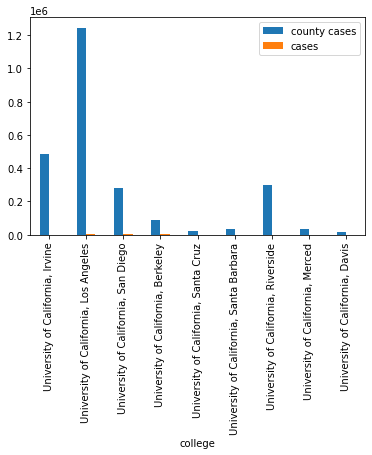

In [285]:
z = ['county cases', 'cases']
dfuc.plot(x="college", y=z, kind="bar")

In [435]:
df3= pd.read_csv('county_pops.csv')
df3.head()

Unnamed: 0   STNAME         CTYNAME  POPESTIMATE2020
0           1  Alabama  Autauga County            56145
1           2  Alabama  Baldwin County           229287
2           3  Alabama  Barbour County            24589
3           4  Alabama     Bibb County            22136
4           5  Alabama   Blount County            57879

In [436]:
df3.rename(columns = {'POPESTIMATE2020':'county pop'}, inplace = True)
df3.rename(columns = {'CTYNAME':'county'}, inplace = True)

df3['county']=df3['county'].str.replace('County','')
df3['county'] = df3['county'].str[:-1]
df3.head()

Unnamed: 0   STNAME   county  county pop
0           1  Alabama  Autauga       56145
1           2  Alabama  Baldwin      229287
2           3  Alabama  Barbour       24589
3           4  Alabama     Bibb       22136
4           5  Alabama   Blount       57879

In [437]:
dft= df3[df3['county'] == 'Los Angeles']

dft.head()

Unnamed: 0      STNAME       county  county pop
205         210  California  Los Angeles     9943046

In [439]:
df3.rename(columns = {'STNAME':'state'}, inplace = True)
df3.head()

Unnamed: 0    state   county  county pop
0           1  Alabama  Autauga       56145
1           2  Alabama  Baldwin      229287
2           3  Alabama  Barbour       24589
3           4  Alabama     Bibb       22136
4           5  Alabama   Blount       57879

In [440]:
w = df3['county'].to_list()
print(w)

['Autauga', 'Baldwin', 'Barbour', 'Bibb', 'Blount', 'Bullock', 'Butler', 'Calhoun', 'Chambers', 'Cherokee', 'Chilton', 'Choctaw', 'Clarke', 'Clay', 'Cleburne', 'Coffee', 'Colbert', 'Conecuh', 'Coosa', 'Covington', 'Crenshaw', 'Cullman', 'Dale', 'Dallas', 'DeKalb', 'Elmore', 'Escambia', 'Etowah', 'Fayette', 'Franklin', 'Geneva', 'Greene', 'Hale', 'Henry', 'Houston', 'Jackson', 'Jefferson', 'Lamar', 'Lauderdale', 'Lawrence', 'Lee', 'Limestone', 'Lowndes', 'Macon', 'Madison', 'Marengo', 'Marion', 'Marshall', 'Mobile', 'Monroe', 'Montgomery', 'Morgan', 'Perry', 'Pickens', 'Pike', 'Randolph', 'Russell', 'St. Clair', 'Shelby', 'Sumter', 'Talladega', 'Tallapoosa', 'Tuscaloosa', 'Walker', 'Washington', 'Wilcox', 'Winston', 'Aleutians East Boroug', 'Aleutians West Census Are', 'Anchorage Municipalit', 'Bethel Census Are', 'Bristol Bay Boroug', 'Chugach Census Are', 'Copper River Census Are', 'Denali Boroug', 'Dillingham Census Are', 'Fairbanks North Star Boroug', 'Haines Boroug', 'Hoonah-Angoon

In [358]:
a = dfm['county'].to_list()
print(a)

['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Sumter', 'Sumter', 'Lauderdale', 'Shelby', 'Shelby', 'Shelby', 'Shelby', 'Shelby', 'Shelby', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Jefferson', 'Tuscaloosa', 'Macon', 'Macon', 'Pike', 'Pike', 'Randolph', 'Randolph', 'Marshall', 'Marshall', 'Mobile', 'Covington', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Montgomery', 'Lee', 'Lee', 'Lee', 'Lee', 'Walker', 'Walker', 'Limestone', 'Limestone', 'Tallapoosa', 'Coffee', 'Coffee', 'Etowah', 'Calhoun', 'Calhoun', 'Fairbanks North Star Borough', 'Juneau City and Borough', 'Pima', 'Coconino', 'Mohave', 'Maricopa', 'Maricopa', 'A

In [441]:
dfmaster = pd.merge(dfm, df3, on=['county','state'])
dfmaster.head()

Unnamed: 0_x        date     state   county          city  ipeds_id  \
0             0  2021-05-26   Alabama  Madison    Huntsville    100654   
1            20  2021-05-26   Alabama  Madison    Huntsville    100706   
2           223  2021-05-26   Florida  Madison       Madison    136145   
3           308  2021-05-26     Idaho  Madison       Rexburg    142522   
4           349  2021-05-26  Illinois  Madison  Edwardsville    149231   

                                     college  cases  cases_2021 notes  ...  \
0                     Alabama A&M University     41         NaN   NaN  ...   
1        University of Alabama in Huntsville    393       183.0   NaN  ...   
2                      North Florida College     35        17.0   NaN  ...   
3             Brigham Young University-Idaho   2655       876.0   NaN  ...   
4  Southern Illinois University Edwardsville    472       160.0   NaN  ...   

                                 school.name school.locale      id  \
0                   Alabama A & M University          12.0  100654   
1        University of Alabama in Huntsville          12.0  100706   
2                      North Florida College          41.0  136145   
3             Brigham Young University-Idaho          32.0  142522   
4  Southern Illinois University-Edwardsville          21.0  149231   

   num_students  cases_per_capita    locale_name  \
0        5343.0          0.007674  City: Midsize   
1        8145.0          0.048250  City: Midsize   
2        1768.0          0.019796  Rural: Fringe   
3       78838.0          0.033677  Town: Distant   
4       12972.0          0.036386  Suburb: Large   

                                locale_name_detailed county cases  \
0  City: Midsize (population of at least 100,000 ...       147784   
1  City: Midsize (population of at least 100,000 ...       147784   
2  Rural: Fringe (rural territory up to 5 miles f...       147784   
3  Town: Distant (in urban cluster more than 10 m...       147784   
4  Suburb: Large (outside principal city, in urba...       147784   

   Unnamed: 0_y  county pop  
0            45      379453  
1            45      379453  
2           369       18707  
3           597       40318  
4           669      262635  

[5 rows x 21 columns]

In [442]:
w = dfmaster['college'].to_list()
print(w)

['Alabama A&M University', 'University of Alabama in Huntsville', 'North Florida College', 'Brigham Young University-Idaho', 'Southern Illinois University Edwardsville', 'Anderson University', 'Berea College ', 'Eastern Kentucky University', 'SUNY Morrisville', 'Colgate University', 'Union University', 'Jackson State Community College', 'Lane College', 'University of West Alabama', 'Georgia Southwestern State University', 'University of North Alabama', 'University of Montevallo', 'Rhodes College', 'Southwest Tennessee Community College', 'Tennessee College of Applied Technology-Memphis', 'University of Memphis', 'Christian Brothers University', 'University of Alabama at Birmingham', 'Samford University', 'Miles College', 'University of Arkansas at Pine Bluff', 'Red Rocks Community College', 'Colorado Christian University', 'Colorado School of Mines', 'University of Louisville', 'Sullivan University', 'Bellarmine University', 'Galen College of Nursing-Louisville', 'Jefferson Community a

In [443]:
dfmaster['county_cases_per_capita'] = dfmaster['county cases']/dfmaster['county pop']
dfmaster.head(50)

Unnamed: 0_x        date          state      county            city  \
0              0  2021-05-26        Alabama     Madison      Huntsville   
1             20  2021-05-26        Alabama     Madison      Huntsville   
2            223  2021-05-26        Florida     Madison         Madison   
3            308  2021-05-26          Idaho     Madison         Rexburg   
4            349  2021-05-26       Illinois     Madison    Edwardsville   
5            357  2021-05-26        Indiana     Madison        Anderson   
6            424  2021-05-26       Kentucky     Madison           Berea   
7            428  2021-05-26       Kentucky     Madison        Richmond   
8            890  2021-05-26       New York     Madison     Morrisville   
9            814  2021-05-26       New York     Madison        Hamilton   
10          1235  2021-05-26      Tennessee     Madison         Jackson   
11          1213  2021-05-26      Tennessee     Madison         Jackson   
12          1215  2021-05-26      Tennessee     Madison         Jackson   
13            24  2021-05-26        Alabama      Sumter      Livingston   
14           282  2021-05-26        Georgia      Sumter        Americus   
15            22  2021-05-26        Alabama  Lauderdale        Florence   
16            21  2021-05-26        Alabama      Shelby      Montevallo   
17          1224  2021-05-26      Tennessee      Shelby         Memphis   
18          1227  2021-05-26      Tennessee      Shelby         Memphis   
19          1229  2021-05-26      Tennessee      Shelby         Memphis   
20          1236  2021-05-26      Tennessee      Shelby         Memphis   
21          1207  2021-05-26      Tennessee      Shelby         Memphis   
22            19  2021-05-26        Alabama   Jefferson      Birmingham   
23            13  2021-05-26        Alabama   Jefferson      Birmingham   
24            12  2021-05-26        Alabama   Jefferson       Fairfield   
25            57  2021-05-26       Arkansas   Jefferson      Pine Bluff   
26           152  2021-05-26       Colorado   Jefferson        Lakewood   
27           135  2021-05-26       Colorado   Jefferson        Lakewood   
28           139  2021-05-26       Colorado   Jefferson          Golden   
29           450  2021-05-26       Kentucky   Jefferson      Louisville   
30           447  2021-05-26       Kentucky   Jefferson      Louisville   
31           423  2021-05-26       Kentucky   Jefferson      Louisville   
32           430  2021-05-26       Kentucky   Jefferson      Louisville   
33           435  2021-05-26       Kentucky   Jefferson      Louisville   
34           667  2021-05-26    Mississippi   Jefferson          Lorman   
35           841  2021-05-26       New York   Jefferson       Watertown   
36           990  2021-05-26           Ohio   Jefferson    Steubenville   
37          1205  2021-05-26      Tennessee   Jefferson  Jefferson City   
38          1257  2021-05-26          Texas   Jefferson        Beaumont   
39          1419  2021-05-26  West Virginia   Jefferson   Shepherdstown   
40            18  2021-05-26        Alabama  Tuscaloosa      Tuscaloosa   
41            17  2021-05-26        Alabama       Macon       Tuskeegee   
42           336  2021-05-26       Illinois       Macon         Decatur   
43            16  2021-05-26        Alabama        Pike            Troy   
44           451  2021-05-26       Kentucky        Pike       Pikeville   
45            15  2021-05-26        Alabama    Randolph          Wadley   
46            40  2021-05-26       Arkansas    Randolph      Pocahontas   
47            14  2021-05-26        Alabama    Marshall            Boaz   
48           395  2021-05-26           Iowa    Marshall    Marshalltown   
49            23  2021-05-26        Alabama      Mobile          Mobile   

    ipeds_id                                          college  cases  \
0     100654                           Alabama A&M University     41   
1     100706              Universi

In [449]:
df_ny = dfmaster[dfmaster['state'] == 'California'] 
df_ny.head()

Unnamed: 0_x        date       state  county       city  ipeds_id  \
138           107  2021-05-26  California  Orange  Santa Ana    121619   
139           110  2021-05-26  California  Orange     Orange    399212   
140           119  2021-05-26  California  Orange    Irvine     110653   
141            74  2021-05-26  California  Orange  Fullerton    110565   
142            84  2021-05-26  California  Orange     Irvine    112075   

                                    college  cases  cases_2021 notes  ...  \
138                       Santa Ana College     37        12.0   NaN  ...   
139                 Santiago Canyon College     14         6.0   NaN  ...   
140        University of California, Irvine    617       276.0   NaN  ...   
141  California State University, Fullerton     45        23.0   NaN  ...   
142             Concordia University Irvine     82        59.0   NaN  ...   

     school.locale      id  num_students  cases_per_capita    locale_name  \
138           11.0  121619       35606.0          0.001039    City: Large   
139           12.0  399212       15808.0          0.000886  City: Midsize   
140           11.0  110653       30865.0          0.019990    City: Large   
141           21.0  110565       40621.0          0.001108  Suburb: Large   
142           11.0  112075        2046.0          0.040078    City: Large   

                                  locale_name_detailed county cases  \
138        City: Large (population of 250,000 or more)       486025   
139  City: Midsize (population of at least 100,000 ...       486025   
140        City: Large (population of 250,000 or more)       486025   
141  Suburb: Large (outside principal city, in urba...       486025   
142        City: Large (population of 250,000 or more)       486025   

    Unnamed: 0_y  county pop  county_cases_per_capita  
138          221     3166857                 0.153472  
139          221     3166857                 0.153472  
140          221     3166857                 0.153472  
141          221     3166857                 0.153472  
142          221     3166857                 0.153472  

[5 rows x 22 columns]

In [465]:
dfuc= df_ny[(df_ny['college'] == 'University of California, Davis') | (df_ny['college'] == 'University of California, Merced')
                  | (df_ny['college'] == 'University of California, Riverside')
                  | (df_ny['college'] == 'University of California, Irvine')
                  | (df_ny['college'] == 'University of California, Santa Cruz')
                  | (df_ny['college'] == 'University of California, Santa Barbara')
                  | (df_ny['college'] == 'University of California, San Diego')
                  | (df_ny['college'] == 'University of California, Berkeley')] 
dfuc.head(20)

Unnamed: 0_x        date       state         county           city  \
140           119  2021-05-26  California         Orange        Irvine    
193           123  2021-05-26  California      San Diego      San Diego   
201           117  2021-05-26  California        Alameda       Berkeley   
206           125  2021-05-26  California     Santa Cruz     Santa Cruz   
207           124  2021-05-26  California  Santa Barbara  Santa Barbara   
208           122  2021-05-26  California      Riverside      Riverside   
210           121  2021-05-26  California         Merced         Merced   
211           118  2021-05-26  California           Yolo          Davis   

     ipeds_id                                  college  cases  cases_2021  \
140    110653         University of California, Irvine    617       276.0   
193    110680      University of California, San Diego   1543       635.0   
201    110635       University of California, Berkeley   1095       679.0   
206    110714     University of California, Santa Cruz    228       121.0   
207    110705  University of California, Santa Barbara    269       236.0   
208    110671      University of California, Riverside    433       178.0   
210    445188         University of California, Merced    124        63.0   
211    110644          University of California, Davis    678       555.0   

                                                 notes  ...  school.locale  \
140                                                NaN  ...           11.0   
193  Total is known to include one or more cases fr...  ...           11.0   
201                                                NaN  ...           12.0   
206                                                NaN  ...           13.0   
207                                                NaN  ...           22.0   
208                                                NaN  ...           11.0   
210                                                NaN  ...           41.0   
211                                                NaN  ...           23.0   

         id  num_students  cases_per_capita      locale_name  \
140  110653       30865.0          0.019990      City: Large   
193  110680       30143.0          0.051189      City: Large   
201  110635       32309.0          0.033891    City: Midsize   
206  110714       18534.0          0.012302      City: Small   
207  110705       23559.0          0.011418  Suburb: Midsize   
208  110671       21540.0          0.020102      City: Large   
210  445188        7783.0          0.015932    Rural: Fringe   
211  110644       32197.0          0.021058    Suburb: Small   

                                  locale_name_detailed county cases  \
140        City: Large (population of 250,000 or more)       486025   
193        City: Large (population of 250,000 or more)       280619   
201  City: Midsize (population of at least 100,000 ...        89112   
206         City: Small (population less than 100,000)        24242   
207  Suburb: Midsize (outside principal city, in ur...        34526   
208        City: Large (population of 250,000 or more)       300929   
210  Rural: Fringe (rural territory up to 5 miles f...        32193   
211  Suburb: Small (outside principal city, in urba...        14083   

    Unnamed: 0_y  county pop  county_cases_per_capita  
140          221     3166857                 0.153472  
193          228     3332427                 0.084209  
201          192     1662323                 0.053607  
206          235      269925                 0.089810  
207          233      444766                 0.077627  
208          224     2489188                 0.120894  
210          215      279252                 0.115283  
211          248      219728                 0.064093  

[8 rows x 22 columns]

<AxesSubplot:xlabel='college'>

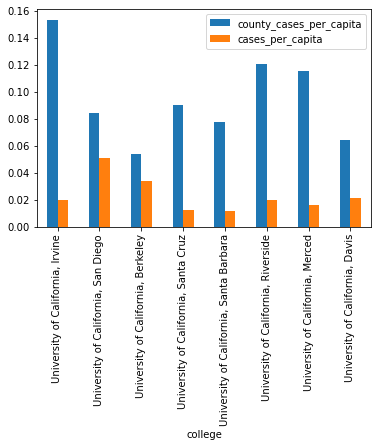

In [468]:
a = ['county_cases_per_capita', 'cases_per_capita']
dfuc.plot(x="college", y=a, kind="bar")

<AxesSubplot:xlabel='college'>

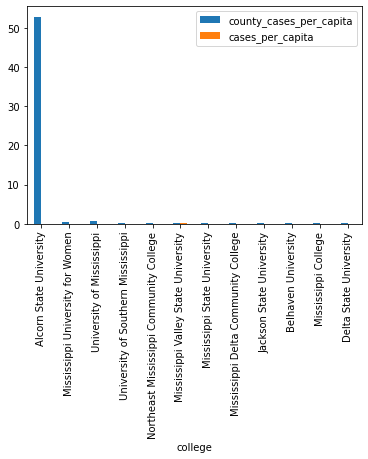

In [464]:
df_ari = dfmaster[dfmaster['state'] == 'Florida'] 
df_ari.plot(x="college", y=a, kind="bar")